In [8]:
from scipy.stats import binom, norm
from scipy.integrate import quad
import numpy as np

N = 125
A = 1
R = 0
M = 1
q = 0.02
rho = 0.5

tranches = [[1,3],[4, 6],[7,9]]

def p(M, rho, lims):
    qM = norm.cdf((norm.ppf(q)-np.sqrt(rho)*M)/(np.sqrt(1-rho)))
    pN = binom(N, qM)
    prob = 3*(pN.cdf(N) - pN.cdf(lims[1]-1))
    for i in range(lims[0], lims[1]):
        index = i-lims[0]-1
        prob += index*pN.pmf(index)        
    return norm.pdf(M)*prob

res = [[],[],[]]
for i in range(len(tranches)):
    for rho in np.arange(0, 1.05, 0.05):
        if rho == 1.0:
            rho = 0.99
        v = quad(p, -np.inf, np.inf, args=(rho, tranches[i]))
        res[i].append(v[0])

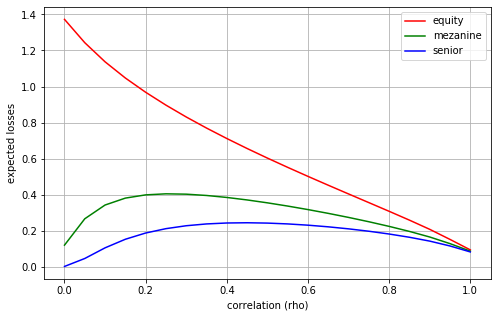

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 1.05, 0.05), res[0], label="equity", color='red')
plt.plot(np.arange(0, 1.05, 0.05), res[1], label="mezanine", color='green')
plt.plot(np.arange(0, 1.05, 0.05), res[2], label="senior", color='blue')
plt.grid(True)
plt.xlabel("correlation (rho)")
plt.ylabel("expected losses")
plt.legend()
plt.show()

In [12]:
for i in range(1, 11):
    for j in range(0, i):
        print (i, j)

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
5 4
6 0
6 1
6 2
6 3
6 4
6 5
7 0
7 1
7 2
7 3
7 4
7 5
7 6
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
